In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing

In [2]:
scores = pd.read_table('sequence_class_scores.tsv')

In [3]:
fetalGRN = pd.read_csv('GRN/significant_eqtls_fetal_brain_cortex.txt',sep="\t")
adultGRN = pd.read_csv('GRN/significant_eqtls_adult_brain_cortex.txt',sep="\t")

C:\Users\catri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,9,10,12,16,17,18,21,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\catri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,9,10,12,16,17,18,20,21,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
scores.head()

,seqclass_max_absdiff,ref_match,contains_unk,chrom,pos,id,ref,alt,strand,PC1 Polycomb / Heterochromatin,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,7.927680,True,False,chr1,8424763,rs301807,A,G,.,0.606201,...,1.656256,1.121879,0.990777,0.500950,0.205382,2.435352,3.455254,2.477615,5.859177,1.899726
1,6.475046,True,False,chr2,199261414,rs4449074,C,T,.,-0.809859,...,-3.535319,-2.884155,0.038440,0.023588,-0.789733,-0.621635,-1.940269,-2.571356,-2.700193,-0.361069
2,3.978184,True,False,chr7,1846899,rs6952808,G,C,.,-0.172300,...,0.360496,0.239879,-0.036562,0.261264,-0.064185,0.411962,2.521718,0.285861,1.665229,0.302822
3,3.956949,True,False,chr22,39655161,rs732381,A,G,.,-0.009459,...,-0.170819,-0.258346,-0.105973,-0.143685,-0.157081,-0.174937,-0.637990,-0.213699,-3.956949,-0.067929
4,3.905901,True,False,chr22,39655161,rs732381,A,T,.,-0.031471,...,-0.137529,-0.223612,-0.131156,-0.142057,-0.086655,-0.177721,-0.621360,-0.202835,-3.905901,-0.070486


In [5]:
data = scores.drop(columns = ['ref_match','contains_unk','chrom','pos','ref','alt','strand'])

In [79]:
data.head()

,seqclass_max_absdiff,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,E2 Multi-tissue,E3 Brain / Melanocyte,L3 Low signal,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,7.927680,0.606201,0.593572,0.374912,0.342616,0.622464,2.928518,0.112604,1.000003,0.185159,...,1.656256,1.121879,0.990777,0.500950,0.205382,2.435352,3.455254,2.477615,5.859177,1.899726
1,6.475046,-0.809859,-0.593694,-0.526392,-0.489996,-0.303026,-2.920980,-1.791462,-2.244181,-0.241196,...,-3.535319,-2.884155,0.038440,0.023588,-0.789733,-0.621635,-1.940269,-2.571356,-2.700193,-0.361069
2,3.978184,-0.172300,-0.080374,-0.223237,-0.257597,-0.016015,0.246804,0.273750,0.005986,-0.116262,...,0.360496,0.239879,-0.036562,0.261264,-0.064185,0.411962,2.521718,0.285861,1.665229,0.302822
3,3.956949,-0.009459,-0.250961,-0.042606,-0.097527,-0.105533,-0.551266,-0.149845,-0.252543,0.080330,...,-0.170819,-0.258346,-0.105973,-0.143685,-0.157081,-0.174937,-0.637990,-0.213699,-3.956949,-0.067929
4,3.905901,-0.031471,-0.199364,-0.058634,-0.097582,-0.087491,-0.497237,-0.144698,-0.215070,0.033697,...,-0.137529,-0.223612,-0.131156,-0.142057,-0.086655,-0.177721,-0.621360,-0.202835,-3.905901,-0.070486


In [7]:
fetal = pd.DataFrame(fetalGRN)
adult = pd.DataFrame(adultGRN)

In [8]:
fetalsnp = fetal['snp']
adultsnp = adult['snp']

In [9]:
eqtl = []
adultsnp = set(adultsnp)
fetalsnp = set(fetalsnp)
for snp in data['id']:
    if snp in adultsnp or snp in fetalsnp:
        eqtl.append(1)
    else:
        eqtl.append(0)         

In [10]:
data['eqtl'] = eqtl
bins = []
x = round(data['eqtl'].count()/100) - 1
for i in range(x):
        bins.append(data['eqtl'][100*i:100*i+99].sum())

Text(0.5, 0, 'Grouped SNPs with decreasing score')

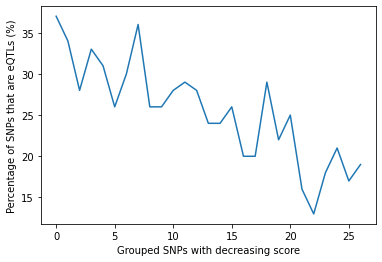

In [77]:
plt.plot(bins)
plt.ylabel('Percentage of SNPs that are eQTLs (%)')
plt.xlabel('Grouped SNPs with decreasing score')

In [12]:
data = data.drop(columns=['id','eqtl'])

In [47]:
names = data.columns
scaled_data=preprocessing.normalize(data,axis=0)
normalised_data = pd.DataFrame(scaled_data,columns=names)
normalised_data.head()

,seqclass_max_absdiff,PC1 Polycomb / Heterochromatin,L1 Low signal,TN1 Transcription,TN2 Transcription,L2 Low signal,E1 Stem cell,E2 Multi-tissue,E3 Brain / Melanocyte,L3 Low signal,...,E10 Brain,TF4 OTX2,HET4 Heterochromatin,L7 Low signal,PC4 Polycomb / Bivalent stem cell Enh,HET5 Centromere,E11 T-cell,TF5 AR,E12 Erythroblast-like,HET6 Centromere
0,0.344689,0.154728,0.214959,0.074683,0.074401,0.342166,0.397477,0.020958,0.206633,0.053787,...,0.258112,0.234896,0.344868,0.388586,0.047243,0.713207,0.495469,0.279745,0.485202,0.741331
1,0.281530,-0.206710,-0.215003,-0.104858,-0.106406,-0.166572,-0.396454,-0.333434,-0.463720,-0.070065,...,-0.550947,-0.603877,0.013380,0.018297,-0.181660,-0.182049,-0.278226,-0.290329,-0.223605,-0.140900
2,0.172968,-0.043978,-0.029107,-0.044469,-0.055939,-0.008803,0.033498,0.050951,0.001237,-0.033773,...,0.056180,0.050225,-0.012726,0.202662,-0.014764,0.120645,0.361604,0.032276,0.137899,0.118170
3,0.172045,-0.002414,-0.090884,-0.008487,-0.021179,-0.058011,-0.074821,-0.027890,-0.052184,0.023335,...,-0.026621,-0.054092,-0.036887,-0.111456,-0.036133,-0.051231,-0.091485,-0.024129,-0.327678,-0.026508
4,0.169826,-0.008033,-0.072199,-0.011680,-0.021190,-0.048093,-0.067488,-0.026932,-0.044440,0.009789,...,-0.021433,-0.046819,-0.045653,-0.110194,-0.019933,-0.052047,-0.089100,-0.022902,-0.323450,-0.027506


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

In [62]:
train_X, val_X, train_y, val_y = train_test_split(data,eqtl)
params = {'min_child_weight':[1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]}

In [63]:
xgb = XGBClassifier(random_state=1, learning_rate = 0.02, n_estimators =600, objective='binary:logistic',silent=True,subsample= 0.6, min_child_weight= 1, max_depth= 4, gamma= 1, colsample_bytree= 0.8)
xgb.fit(train_X,train_y)
pred = xgb.predict(val_X)
print(roc_auc_score(val_y,pred))
print(100*accuracy_score(val_y,pred))

[10:02:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.5470414201183432
75.03628447024674


In [19]:
folds = 5
param_comb = 10
skf = StratifiedKFold(n_splits=folds, shuffle=True)
random_search = RandomizedSearchCV(xgb, param_distributions=params,n_iter=param_comb,scoring='roc_auc',n_jobs=4,cv=skf.split(data,eqtl),verbose=3)
random_search.fit(data,eqtl)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[14:47:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x0000028E08AB8430>,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=1, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction...
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                   

In [64]:
print(random_search.best_estimator_)
print(random_search.best_score_)
print(random_search.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.6916659455623324
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1, 'colsample_bytree': 0.6}


In [65]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
model = XGBClassifier(n_estimators = 100, random_state = 1)
CV = RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=CV,scoring='roc_auc')
grid_result = grid.fit(train_X, train_y)

In [23]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.6494649331826133
{'scale_pos_weight': 10}


In [75]:
# using some of these parameters
model = XGBClassifier(random_state = 1, scale_pos_weight=10, subsample = 1, min_child_weight = 1, max_depth = 5, gamma = 1, colsample_bytree = 0.6)
model.fit(train_X,train_y)
predict = model.predict(val_X)
print(roc_auc_score(val_y, predict))
print(accuracy_score(val_y, predict))

0.6533284023668638
0.7329462989840348
